# first attempt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# for data cleaning
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# read data from excel file
df = pd.read_excel('drive/My Drive/Data set for classification tree.xlsx', usecols=7,)

In [0]:
# see first 5 rows
df.head()

,shift,incident occurance division,incident category,incident location,impact,activity type,primary cause,year,month,day
0,A,Wire Division,Near Miss,Workplace,First Aid,Operations,Fall from Height,2018,May,3
1,A,Wire Division,Near Miss,Workplace,First Aid,Operations,Fall of Object,2018,Apr,3
2,C,Wire Division,Near Miss,Workplace,First Aid,Operations,Fall of Object,2018,Mar,4
3,A,Wire Division,Near Miss,Workplace,First Aid,Operations,Hit by Object,2018,Mar,5
4,A,Wire Division,Near Miss,Workplace,Equipment Property Damage,Process Related,Interlock Failure,2018,Mar,5


In [0]:
df.dropna(inplace=True)

In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [0]:
df['Date'].dt.year.head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Date, dtype: int64

In [0]:
# shift A = 6 - 14
# shift B = 14 - 22
# shift C = 22 - 6

# function to get the shift of the workers from the time
def get_shift(h):
    if h >= 6 and h < 14:
        return 'A'
    elif h >=14 and h < 22:
        return 'B'
    return 'C'

In [0]:
df['Time'] = df.loc[:, 'Time'].apply(lambda x: get_shift(x.hour))

In [0]:
# create a year column in the data
df['year'] = df['Date'].dt.year

# create a month column
import calendar
df['month'] = df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])

# getting a day column from date
df['day'] = df['Date'].dt.dayofweek

In [0]:
# renaming the columns
df = df.rename({'Time':'Shift', 'Incident Loaction':'Incident Location'}, axis='columns')

# converting to lower case letters for convenience
df = df.rename(str.lower, axis='columns')

# drop the date column
df = df.drop('date', axis=1)

In [0]:
# arranging the columns
df = df[['year', 'month', 'day', 'shift', 'incident occurance division', 'incident category', 
         'incident location', 'impact', 'activity type', 'primary cause']]

In [0]:
# converting day and year from int to object datatype
df['day'] = df.day.astype(str).astype(object)
df['year'] = df.year.astype(str).astype(object)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 0 to 716
Data columns (total 10 columns):
year                           709 non-null object
month                          709 non-null object
day                            709 non-null object
shift                          709 non-null object
incident occurance division    709 non-null object
incident category              709 non-null object
incident location              709 non-null object
impact                         709 non-null object
activity type                  709 non-null object
primary cause                  709 non-null object
dtypes: object(10)
memory usage: 60.9+ KB


In [0]:
df.to_csv('cleaned_data.csv', index=False)

In [0]:
!cp cleaned_data.csv drive/My\ Drive/

In [0]:
train = pd.read_csv('/content/drive/My Drive/cleaned_data.csv')

In [0]:
# converting day and year from int to object datatype
train['day'] = train.day.astype(str).astype(object)
train['year'] = train.year.astype(str).astype(object)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 708
Data columns (total 10 columns):
year                           684 non-null object
month                          684 non-null object
day                            684 non-null object
shift                          684 non-null object
incident occurance division    684 non-null object
incident category              684 non-null object
incident location              684 non-null object
impact                         684 non-null object
activity type                  684 non-null object
primary cause                  684 non-null object
dtypes: object(10)
memory usage: 58.8+ KB


In [0]:
train.head()

,year,month,day,shift,incident occurance division,incident category,incident location,impact,activity type,primary cause
0,2018,May,3,A,Wire Division,Near Miss,Workplace,First Aid,Operations,Fall from Height
1,2018,Apr,3,A,Wire Division,Near Miss,Workplace,First Aid,Operations,Fall of Object
2,2018,Mar,4,C,Wire Division,Near Miss,Workplace,First Aid,Operations,Fall of Object
3,2018,Mar,5,A,Wire Division,Near Miss,Workplace,First Aid,Operations,Hit by Object
4,2018,Mar,5,A,Wire Division,Near Miss,Workplace,Equipment Property Damage,Process Related,Interlock Failure


In [0]:
# taking a look at unique values of each attribute
def unique_values(df):
    for col in df.columns[1:]:
        print('='*50)
        print('\033[1m' + col + '\033[0m')
        print(df[col].value_counts())

In [0]:
unique_values(train)

shift
A    375
B    233
C    101
Name: shift, dtype: int64
incident occurance division
Steel Manufacturing                     237
Wire Division                           178
Shared Services                         119
Tubes Division                           32
West Bokaro                              32
TSK Operations                           27
O M &amp; Q                              23
FAM                                      14
Iron Making                              12
Jharia Division                          10
IBMD                                      7
Engineering &amp; Project                 7
KPO E&amp; TGS                            6
KPO                                       3
President - TQM &amp; Steel Business      2
Name: incident occurance division, dtype: int64
incident category
Near Miss    709
Name: incident category, dtype: int64
incident location
Workplace      697
Mines            7
Inside Road      5
Name: incident location, dtype: int64
impact
Equipment Pr

# incident occuring division

In [0]:
# merging steel business with steel manufacturing
train.loc[train['incident occurance division'] == 'President - TQM &amp; Steel Business', 'incident occurance division'] = 'Steel Manufacturing'

In [0]:
# merging the two KPOs to one KPO
train.loc[train['incident occurance division'].isin(['KPO E&amp; TGS', 'KPO']), 'incident occurance division'] = 'KPO'

In [0]:
# replacing &amp; with 'and'
# train.loc[train['incident occurance division'].str.contains('&amp;'), 'incident occurance division'] = 

In [0]:
# rechecking the category
train['incident occurance division'].value_counts()

Steel Manufacturing          239
Wire Division                178
Shared Services              119
West Bokaro                   32
Tubes Division                32
TSK Operations                27
O M &amp; Q                   23
FAM                           14
Iron Making                   12
Jharia Division               10
KPO                            9
Engineering &amp; Project      7
IBMD                           7
Name: incident occurance division, dtype: int64

# impact

In [0]:
# merging uncontrolled environmental discharge and toxic release
train.loc[train['impact'] == 'Uncontrolled Environmental Discharge', 'impact'] = 'Toxic Release'

In [0]:
# deleting toxic release row
del_rows = train[train['impact'].isin(['Toxic Release'])]
train.drop(del_rows.index, axis=0, inplace=True)

In [0]:
train['impact'].value_counts()

Equipment Property Damage    327
First Aid                    244
LTI                           49
Fatality                      29
Derailment                    24
Fire                          18
Foreign Body                  11
Name: impact, dtype: int64

# activity type

In [0]:
# merging open cast-maintenance and underground-maintanence with maintenance
train.loc[train['activity type'].isin(['Open Cast - Maintenance', 'Underground - Maintenance']), 'activity type'] = 'Maintenance'

In [0]:
# merging process related, peripheral area, and open cast-operations to operations
train.loc[train['activity type'].isin(['Process  Related', 'Peripheral Area / Office', 'Open Cast - Operations']), 'activity type'] = 'Operations'

In [0]:
train.loc[train['activity type'].isin(['Other Roads', 'Main Road']), 'activity type'] = 'Road'

In [0]:
# deleting rail and road row
del_rows = train[train['activity type'].isin(['Road', 'Rail'])]
train.drop(del_rows.index, axis=0, inplace=True)

In [0]:
# deleting the construction site
del_rows = train[train['activity type'].isin(['Construction Site'])]
train.drop(del_rows.index, axis=0, inplace=True)

In [0]:
train['activity type'].value_counts()

Operations     455
Maintenance    214
Name: activity type, dtype: int64

# primary cause

In [0]:
# combining anything related to electricity to electrical fault
train.loc[train['primary cause'].isin(['Electrical cable damage', 'short circuit', 'Loose electrical wire', 'Electrocution', 'Inadequate Insulation', 'Leakage current']), 'primary cause'] = 'Electrical fault'

In [0]:
# combine appropriate categories to hit by object
train.loc[train['primary cause'].isin(['Vehicle Dashing', 'Dashing or Collision']), 'primary cause'] = 'Hit by Object'

In [0]:
# merging relevant categories to poor maintenance
train.loc[train['primary cause'].isin(['Poor valve condition', 'Damaged gas line', 
                                       'Improper scaffoldings', 'Poor wagon Condition', 'Failure of Positive isolation', 'Toxic Release']), 'primary cause'] = 'Poor maintenance of eqp.'

In [0]:
# merging relevant categories to fall of object
train.loc[train['primary cause'].isin(['Failure of Lifting Tools &amp; Tackles']), 'primary cause'] = 'Fall of Object'

In [0]:
# merging categories to STF
train.loc[train['primary cause'].isin(['Greasy/ Muddy/ Slippery surface', 'Poor Road Condition',]), 'primary cause'] = 'Slip /trip /fall'

In [0]:
# merging categories to MMI
train.loc[train['primary cause'].isin(['Human Failure', 'Neglegent Driving', 'Outside Miscreants', ]), 'primary cause'] = 'Man-Machine Interface'

In [0]:
# merging fall of spatter and other relevant categories
train.loc[train['primary cause'].isin(['Hot Metal spillage', 'Side fall of material', 'Hot Liquid',]), 'primary cause'] = 'Falling of spatter'

In [0]:
# merging unsafe dismantling to unsafe loading and unloading
train.loc[train['primary cause'].isin(['Unsafe Dismantling']), 'primary cause'] = 'Unsafe loading &amp; Unloading'

In [0]:
# merging relevant categories to inadequate load security
train.loc[train['primary cause'].isin(['Interlock Failure', ]), 'primary cause'] = 'Inadequate load security'

In [0]:
# deleting the rows which has less than 10 data points
del_rows = train[train['primary cause'].isin(['Loose soil', 'No permit to work', 'Structure Instability', 
                                              'Process Parameter beyond Operation Limit', 'Toppling of construction equipment',
                                              'Undesired source of Ignition', 'Two Way formation', 'High Speed', 'Availability of flammable materials'])]
train.drop(del_rows.index, axis=0, inplace=True)

In [0]:
train['primary cause'].value_counts()

Fall of Object                    154
Hit by Object                     147
Unsafe loading &amp; Unloading     94
Electrical fault                   82
Slip /trip /fall                   56
Man-Machine Interface              45
Fall from Height                   42
Inadequate load security           26
Poor maintenance of eqp.           15
Improper stacking of material      13
Falling of spatter                 10
Name: primary cause, dtype: int64

In [0]:
train['primary cause'].nunique()

11

# small changes in data for convenience

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 708
Data columns (total 10 columns):
year                           684 non-null object
month                          684 non-null object
day                            684 non-null object
shift                          684 non-null object
incident occurance division    684 non-null object
incident category              684 non-null object
incident location              684 non-null object
impact                         684 non-null object
activity type                  684 non-null object
primary cause                  684 non-null object
dtypes: object(10)
memory usage: 58.8+ KB


In [0]:
train.head()

,year,month,day,shift,incident occurance division,incident category,incident location,impact,activity type,primary cause
0,2018,May,3,A,Wire Division,Near Miss,Workplace,First Aid,Operations,Fall from Height
1,2018,Apr,3,A,Wire Division,Near Miss,Workplace,First Aid,Operations,Fall of Object
2,2018,Mar,4,C,Wire Division,Near Miss,Workplace,First Aid,Operations,Fall of Object
3,2018,Mar,5,A,Wire Division,Near Miss,Workplace,First Aid,Operations,Hit by Object
4,2018,Mar,5,A,Wire Division,Near Miss,Workplace,Equipment Property Damage,Operations,Inadequate load security


In [0]:
train = train.rename({'incident occurance division':'incident_occurance_division', 'incident category':'incident_category', 
                      'incident location':'incident_location', 'activity type':'activity_type', 
                      'primary cause':'primary_cause'}, axis='columns')

In [0]:
pd.get_dummies(train).head()

,year_2017,year_2018,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,day_0,day_1,day_2,day_3,day_4,day_5,day_6,shift_A,shift_B,shift_C,incident occurance division_Engineering &amp; Project,incident occurance division_FAM,incident occurance division_IBMD,incident occurance division_Iron Making,incident occurance division_Jharia Division,incident occurance division_KPO,incident occurance division_O M &amp; Q,incident occurance division_Shared Services,incident occurance division_Steel Manufacturing,incident occurance division_TSK Operations,incident occurance division_Tubes Division,incident occurance division_West Bokaro,incident occurance division_Wire Division,incident category_Near Miss,incident location_Mines,incident location_Workplace,impact_Derailment,impact_Equipment Property Damage,impact_Fatality,impact_Fire,impact_First Aid,impact_Foreign Body,impact_LTI,activity type_Construction Site,activity type_Maintenance,activity type_Operations,primary cause_Electrical fault,primary cause_Fall from Height,primary cause_Fall of Object,primary cause_Falling of spatter,primary cause_Hit by Object,primary cause_Improper stacking of material,primary cause_Inadequate load security,primary cause_Man-Machine Interface,primary cause_Poor maintenance of eqp.,primary cause_Slip /trip /fall,primary cause_Unsafe loading &amp; Unloading
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# saving data

In [0]:
train.to_csv('cleaned_data2.csv', index=False)

In [0]:
!cp cleaned_data2.csv drive/My\ Drive/

# model

In [0]:
# import dependencies
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [0]:
import re

In [0]:
df = pd.read_csv('cleaned_data2.csv')
df = df.replace(re.compile(r'[ .;&/-]'), '', regex=True)
df.head()

,year,month,day,shift,incident_occurance_division,incident_category,incident_location,impact,activity_type,primary_cause
0,2018,May,3,A,WireDivision,NearMiss,Workplace,FirstAid,Operations,FallfromHeight
1,2018,Apr,3,A,WireDivision,NearMiss,Workplace,FirstAid,Operations,FallofObject
2,2018,Mar,4,C,WireDivision,NearMiss,Workplace,FirstAid,Operations,FallofObject
3,2018,Mar,5,A,WireDivision,NearMiss,Workplace,FirstAid,Operations,HitbyObject
4,2018,Mar,5,A,WireDivision,NearMiss,Workplace,EquipmentPropertyDamage,Operations,Inadequateloadsecurity


In [0]:
# converting day and year from int to object datatype
df['day'] = df.day.astype(str).astype(object)
df['year'] = df.year.astype(str).astype(object)

In [0]:
# seperating the features and target
label = df['activity_type']
data = df.drop(['activity_type', 'incident_category', 'incident_location'], axis=1)

In [0]:
data.head()

,year,month,day,shift,incident_occurance_division,impact,primary_cause
0,2018,May,3,A,WireDivision,FirstAid,FallfromHeight
1,2018,Apr,3,A,WireDivision,FirstAid,FallofObject
2,2018,Mar,4,C,WireDivision,FirstAid,FallofObject
3,2018,Mar,5,A,WireDivision,FirstAid,HitbyObject
4,2018,Mar,5,A,WireDivision,EquipmentPropertyDamage,Inadequateloadsecurity


In [0]:
# one hot encoding the data
data = pd.get_dummies(data,)

In [0]:
label.value_counts()

Operations     455
Maintenance    214
Name: activity_type, dtype: int64

In [0]:
# mapping the label to 0, 1 and 2
label = label.map({'Operations':0, 'Maintenance':1})

In [0]:
label.value_counts()

Operations     455
Maintenance    214
Name: activity_type, dtype: int64

In [0]:
# taking a look at the first five examples
data.head()

,year_2017,year_2018,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,day_0,day_1,day_2,day_3,day_4,day_5,day_6,shift_A,shift_B,shift_C,incident_occurance_division_EngineeringampProject,incident_occurance_division_FAM,incident_occurance_division_IBMD,incident_occurance_division_IronMaking,incident_occurance_division_JhariaDivision,incident_occurance_division_KPO,incident_occurance_division_OMampQ,incident_occurance_division_SharedServices,incident_occurance_division_SteelManufacturing,incident_occurance_division_TSKOperations,incident_occurance_division_TubesDivision,incident_occurance_division_WestBokaro,incident_occurance_division_WireDivision,incident_category_NearMiss,incident_location_Mines,incident_location_Workplace,impact_Derailment,impact_EquipmentPropertyDamage,impact_Fatality,impact_Fire,impact_FirstAid,impact_ForeignBody,impact_LTI,activity_type_Maintenance,activity_type_Operations,primary_cause_Electricalfault,primary_cause_FallfromHeight,primary_cause_Fallingofspatter,primary_cause_FallofObject,primary_cause_HitbyObject,primary_cause_Improperstackingofmaterial,primary_cause_Inadequateloadsecurity,primary_cause_ManMachineInterface,primary_cause_Poormaintenanceofeqp,primary_cause_Sliptripfall,primary_cause_UnsafeloadingampUnloading
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [0]:
# shape of the data
data.shape

(684, 55)

In [0]:
# shape of the label
label.shape

(669,)

In [0]:
# null accuracy
label.value_counts().max() / label.value_counts().sum()

0.680119581464873

In [0]:
# splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=1)

In [0]:
# searching for the best parameters
param_grid = {'max_depth':range(1,33), 'min_samples_leaf':np.linspace(0.1, 0.5, 5), 
              'min_samples_split':np.linspace(0.1, 1, 10), 'max_features':['sqrt', 'log2', None]}

In [0]:
# fitting the tree by using each parameter
%%time
tree = DecisionTreeClassifier( )
gcv = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='accuracy', cv=5,)
gcv.fit(X_train, y_train)

In [0]:
gcv.best_score_

0.7212475633528265

In [0]:
gcv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_train, y_train)

0.9940119760479041

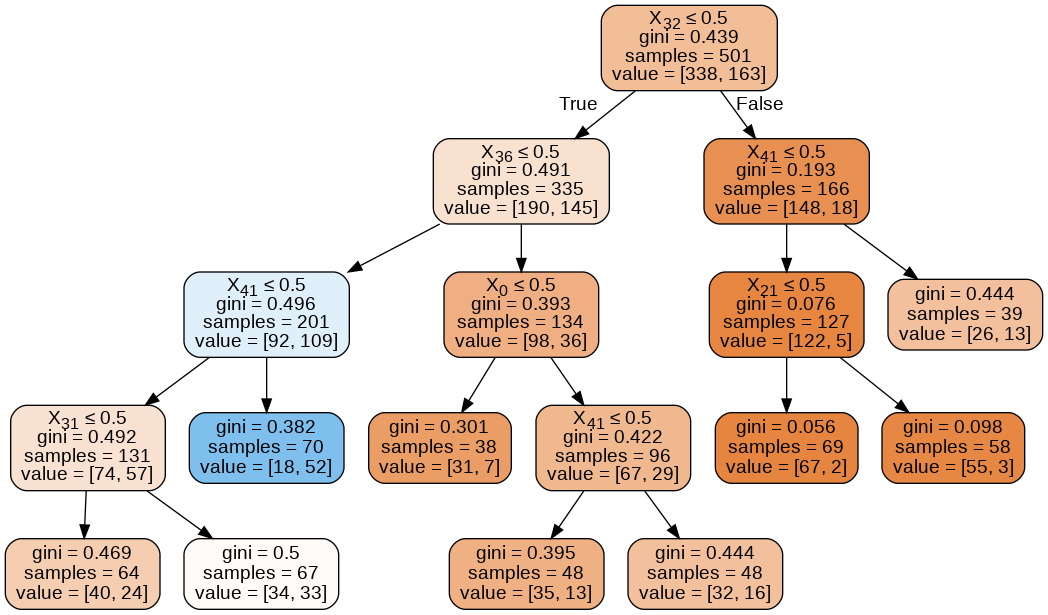

In [0]:
# Visualizing the tree                 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# graph.write_pdf('tree.pdf')
Image(graph.create_png())

In [0]:
# getting the feature importance according to the model and sorting it according the importance score
feat_imp = pd.DataFrame(tree.feature_importances_, index=data.columns, columns=['imp_score'])
feat_imp.sort_values('imp_score', ascending=False)

In [0]:
data.columns[41]

'impact_First Aid'

In [0]:
# code to get rules from the tree

from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [0]:
# rules 
tree_to_code(tree, data.columns)

In [0]:
!pip install skope-rules

     |████████████████████████████████| 2.0MB 3.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/3e/8d/56/464f328ff3200c785626967ee39a6b2efc455469dab615f03e
Successfully built skope-rules


In [0]:
from skrules import SkopeRules


feature_names = data.columns
clf = SkopeRules(max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names=feature_names)

for idx, species in enumerate(label.unique()):
    X, y = data, label
    clf.fit(X, y == idx)
    rules = clf.rules_[0:10]
    print("Activity type: ", species)
    for rule in rules:
        print(rule)
    print()
    print(20*'=')
    print()

Activity type:  0
('impact_FirstAid <= 0.5 and incident_occurance_division_SteelManufacturing > 0.5 and primary_cause_Inadequateloadsecurity <= 0.5', (0.9708601389217987, 0.3667191209828566, 54))
('impact_LTI <= 0.5 and incident_occurance_division_SteelManufacturing <= 0.5 and incident_occurance_division_WireDivision > 0.5', (0.7467654969241767, 0.279638669821904, 3))
('incident_occurance_division_SteelManufacturing <= 0.5 and incident_occurance_division_WireDivision <= 0.5 and primary_cause_Sliptripfall <= 0.5', (0.49238578680203043, 0.26795580110497236, 1))


Activity type:  1
('incident_occurance_division_SteelManufacturing <= 0.5 and incident_occurance_division_WireDivision <= 0.5 and primary_cause_Electricalfault <= 0.5', (0.5815595024130782, 0.6181734286192773, 4))
('incident_occurance_division_SteelManufacturing <= 0.5 and incident_occurance_division_WireDivision > 0.5 and month_Nov <= 0.5', (0.3052144750365121, 0.24857450242065626, 2))




# new_attempt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install catboost
!pip install xgboost

     |████████████████████████████████| 61.2MB 651kB/s 


In [0]:
# regular expressions
import re

# data cleaning and manipulation
import pandas as pd
import numpy as np

# optimization
from scipy.optimize import differential_evolution

# data structure
from collections import OrderedDict

# visulization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# to supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# machine learning
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, \
                             VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/cleaned_data3.csv')

In [0]:
# dropping the category and location column
#df.drop(['incident_category', 'incident_location'], axis=1, inplace=True)

In [0]:
# converting day and year from int to object datatype
df['day'] = df.day.astype(str)
df['year'] = df.year.astype(str)

In [0]:
# converting everything to lower case letters
df = df.apply(lambda x: x.astype(str).str.lower())

In [0]:
# removing unnecessary special characters from the categories
df = df.replace(re.compile(r'amp'), '', regex=True)
df = df.replace(re.compile(r'[&;]'), '', regex=True)
df = df.replace(re.compile(r'[ ./-]'), '_', regex=True)
df = df.replace(re.compile(r'__'), '_', regex=True)

In [0]:
df = pd.read_csv('/content/drive/My Drive/cleaned_data3.csv')

In [0]:
# converting day and year from int to object datatype
df['day'] = df.day.astype(str)
df['year'] = df.year.astype(str)

In [0]:
df.head()

,year,month,day,shift,incident_occurance_division,impact,activity_type,primary_cause
0,2018,may,3,a,wire_division,first_aid,operations,fall_from_height
1,2018,apr,3,a,wire_division,first_aid,operations,fall_of_object
2,2018,mar,4,c,wire_division,first_aid,operations,fall_of_object
3,2018,mar,5,a,wire_division,first_aid,operations,hit_by_object
4,2018,mar,5,a,wire_division,equipment_property_damage,operations,inadequate_load_security


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 8 columns):
year                           669 non-null object
month                          669 non-null object
day                            669 non-null object
shift                          669 non-null object
incident_occurance_division    669 non-null object
impact                         669 non-null object
activity_type                  669 non-null object
primary_cause                  669 non-null object
dtypes: object(8)
memory usage: 41.9+ KB


In [0]:
# taking a look at unique values of each attribute
def unique_values(df):
    for col in df.columns[1:]:
        print('='*50)
        print('\033[1m' + col + '\033[0m')
        print(df[col].value_counts())
        
unique_values(df)

month
jan    83
apr    77
feb    76
mar    73
jun    59
dec    51
may    49
sep    48
nov    42
aug    42
jul    35
oct    34
Name: month, dtype: int64
day
3    119
1    113
0    110
2    103
4     94
5     81
6     49
Name: day, dtype: int64
shift
a    348
b    222
c     99
Name: shift, dtype: int64
incident_occurance_division
steel_manufacturing    229
wire_division          175
shared_services        116
tubes_division          32
west_bokaro             26
tsk_operations          25
o_m_q                   21
fam                     14
iron_making             11
jharia_division          8
ibmd                     6
kpo                      4
engineering_project      2
Name: incident_occurance_division, dtype: int64
impact
equipment_property_damage    312
first_aid                    231
lti                           47
fatality                      29
derailment                    22
fire                          17
foreign_body                  11
Name: impact, dtype: int64
activi

In [0]:
# columns of data
cols = ['year', 'month', 'day', 'shift', 'incident_occurance_division', 'impact', 'primary_cause']

# one hot encoding the data
data = pd.get_dummies(df[cols])

# for catboost
# data = df[cols]

In [0]:
# getting the label and encoding it
label = df['activity_type']
label = label.map({'operations':0, 'maintenance':1})

In [0]:
# verifying the data and label shape
print('Data Shape: ', data.shape)
print('Label Shape: ', label.shape)

Data Shape:  (669, 55)
Label Shape:  (669,)


In [0]:
# applying pca
pca = PCA(n_components=2,)

transformed = pca.fit_transform(data,)

X = transformed[:, 0]
y = transformed[:, 1]

In [0]:
# applying k-means
kmeans = KMeans(n_clusters=2,)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
pd.DataFrame(pca.components_.T, index=data.columns, columns=['PC-1', 'PC-2']).sort_values('PC-1', ascending=False)

,PC-1,PC-2
impact_first_aid,0.514074,0.045974
incident_occurance_division_wire_division,0.286884,0.113287
shift_a,0.249586,-0.619034
primary_cause_fall_of_object,0.160230,0.143588
year_2018,0.142136,0.313466
primary_cause_slip_trip_fall,0.083917,0.014820
month_apr,0.069721,0.070183
day_0,0.056767,-0.043789
primary_cause_fall_from_height,0.027629,-0.005374
incident_occurance_division_tubes_division,0.025499,0.025782


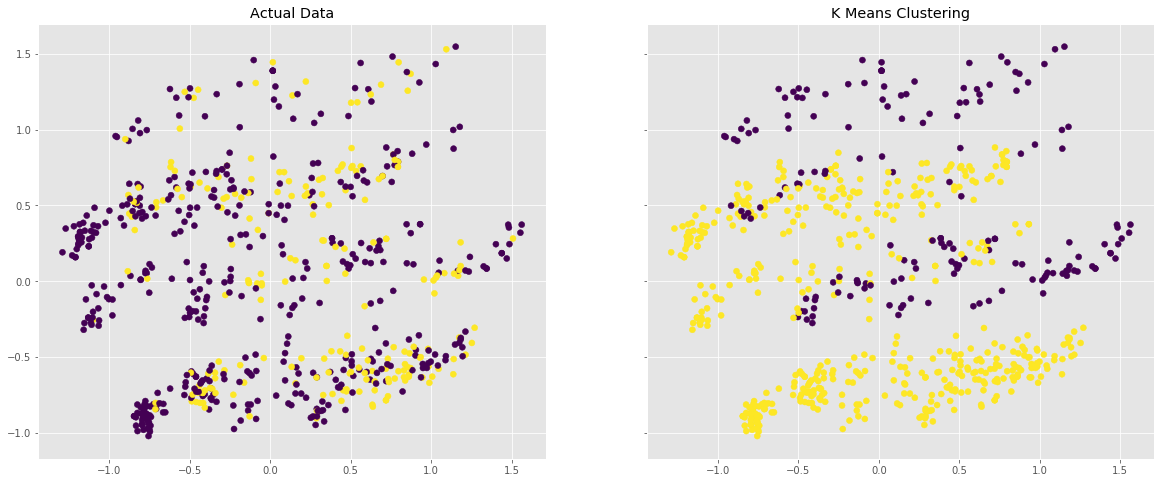

In [0]:
# plotting the data with actual label and label predicted by k-means clustering
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 8))
ax[0].scatter(X, y, c=label,)
ax[0].set_title('Actual Data')
ax[1].scatter(X, y, c=kmeans.labels_)
ax[1].set_title('K Means Clustering')
plt.show()

# from these two plots.....we can see that see the data is not easily predictable

# feature imp. of different classifiers

In [0]:
# training the random forest model
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(data, label)
rfc.score(data, label)

0.7354260089686099

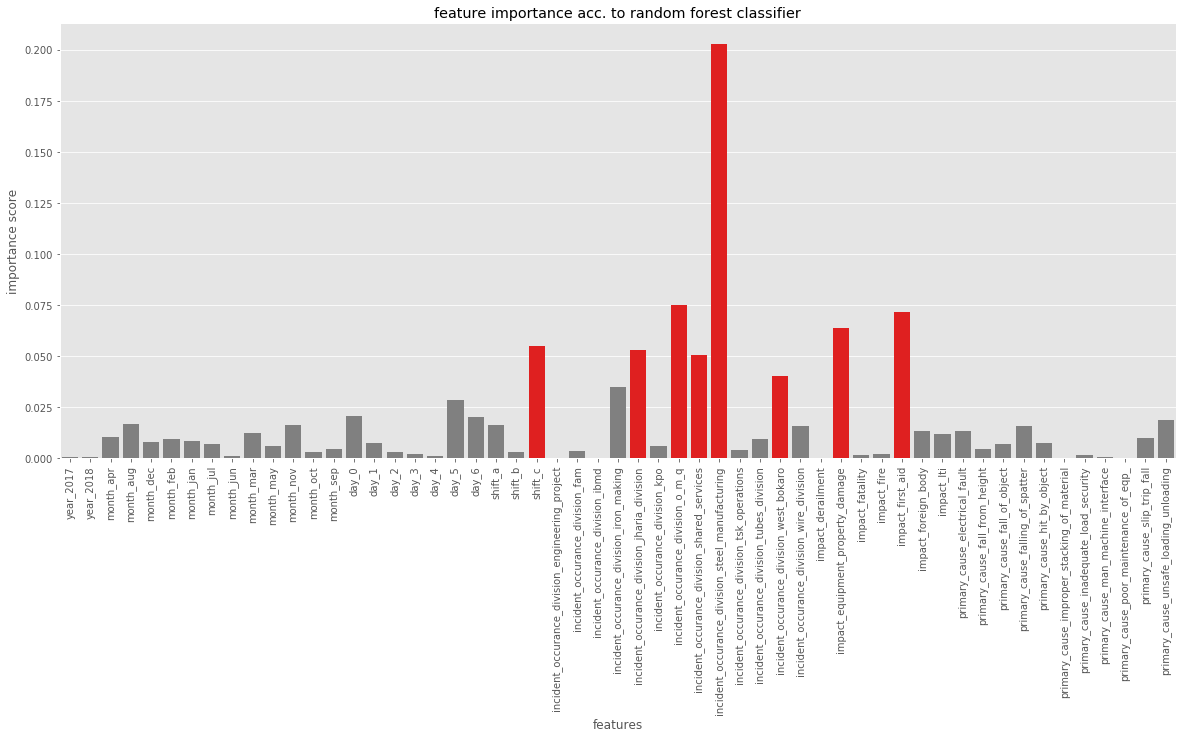

In [0]:
# importance of each feature in decision making according to random forest classifier
rfc_fi = np.sort(rfc.feature_importances_,)[::-1]
plt.figure(figsize=(20, 8))
sns.barplot(y=rfc.feature_importances_, x=data.columns, palette=['red' if x in rfc_fi[:8] else 'grey' for x in rfc.feature_importances_])
plt.title('feature importance acc. to random forest classifier')
plt.ylabel('importance score')
plt.xlabel('features')
plt.xticks(rotation=90)
plt.show()

In [0]:
# training the adaptive boosting classifier model
abc = AdaBoostClassifier(learning_rate=0.1, random_state=24,)
abc.fit(data, label)
abc.score(data, label)

0.7428998505231689

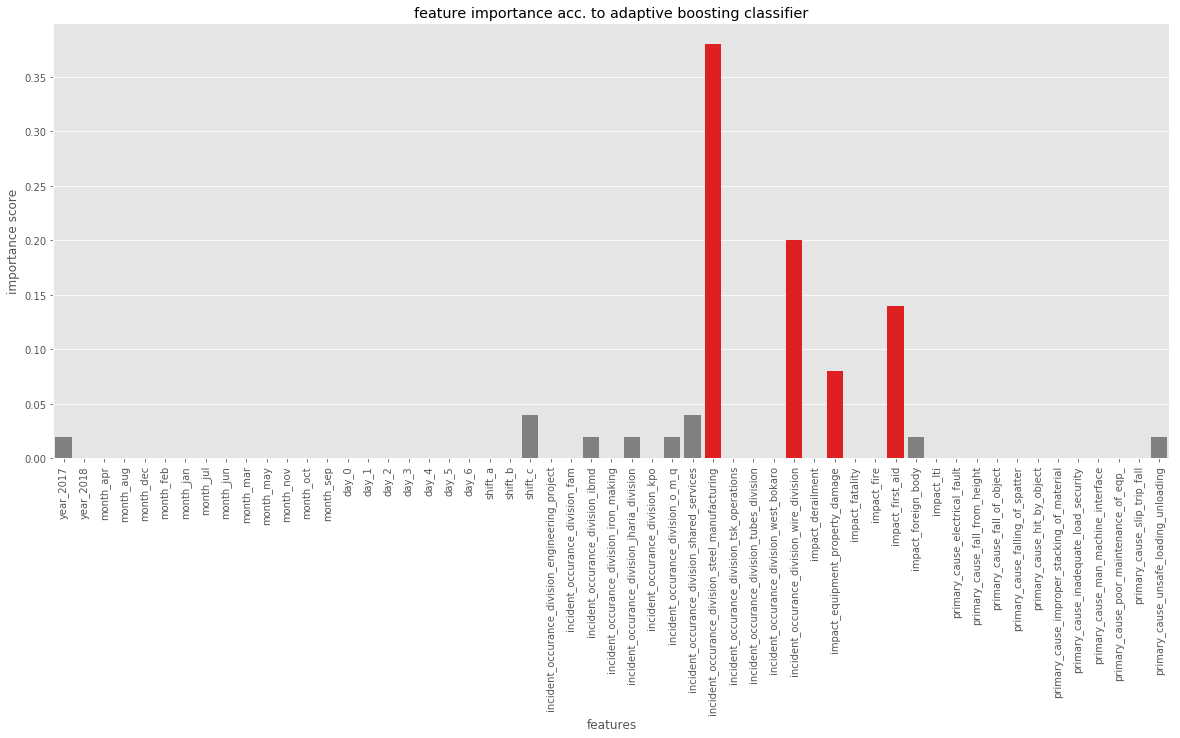

In [0]:
# importance of each feature in decision making according to adaptive boosting classifier
abc_fi = np.sort(abc.feature_importances_,)[::-1]
plt.figure(figsize=(20, 8))
sns.barplot(y=abc.feature_importances_, x=data.columns, palette=['red' if x in abc_fi[:4] else 'grey' for x in abc.feature_importances_])
plt.title('feature importance acc. to adaptive boosting classifier')
plt.ylabel('importance score')
plt.xlabel('features')
plt.xticks(rotation=90)
plt.show()

In [0]:
# gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(data, label)
gbc.score(data, label)

0.8565022421524664

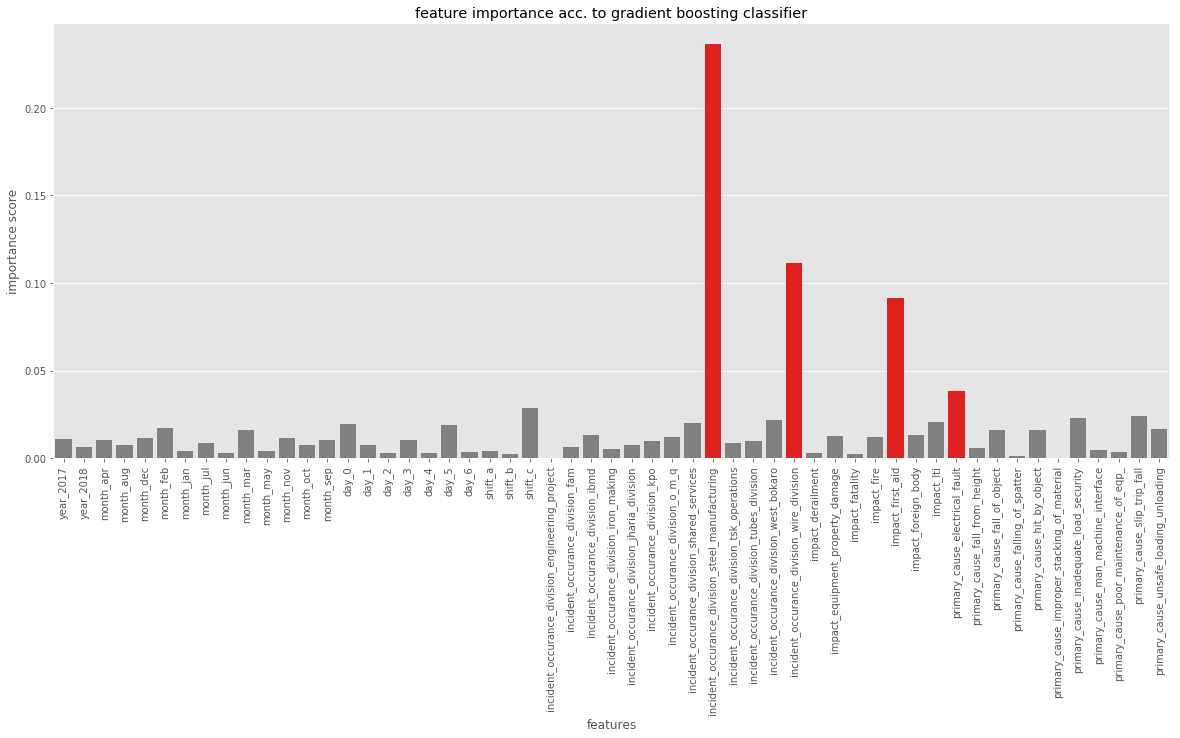

In [0]:
# importance of each feature in decision making according to gradient boosting classifier
gbc_fi = np.sort(gbc.feature_importances_,)[::-1]
plt.figure(figsize=(20, 8))
sns.barplot(y=gbc.feature_importances_, x=data.columns, palette=['red' if x in gbc_fi[:4] else 'grey' for x in gbc.feature_importances_])
plt.title('feature importance acc. to gradient boosting classifier')
plt.ylabel('importance score')
plt.xlabel('features')
plt.xticks(rotation=90)
plt.show()

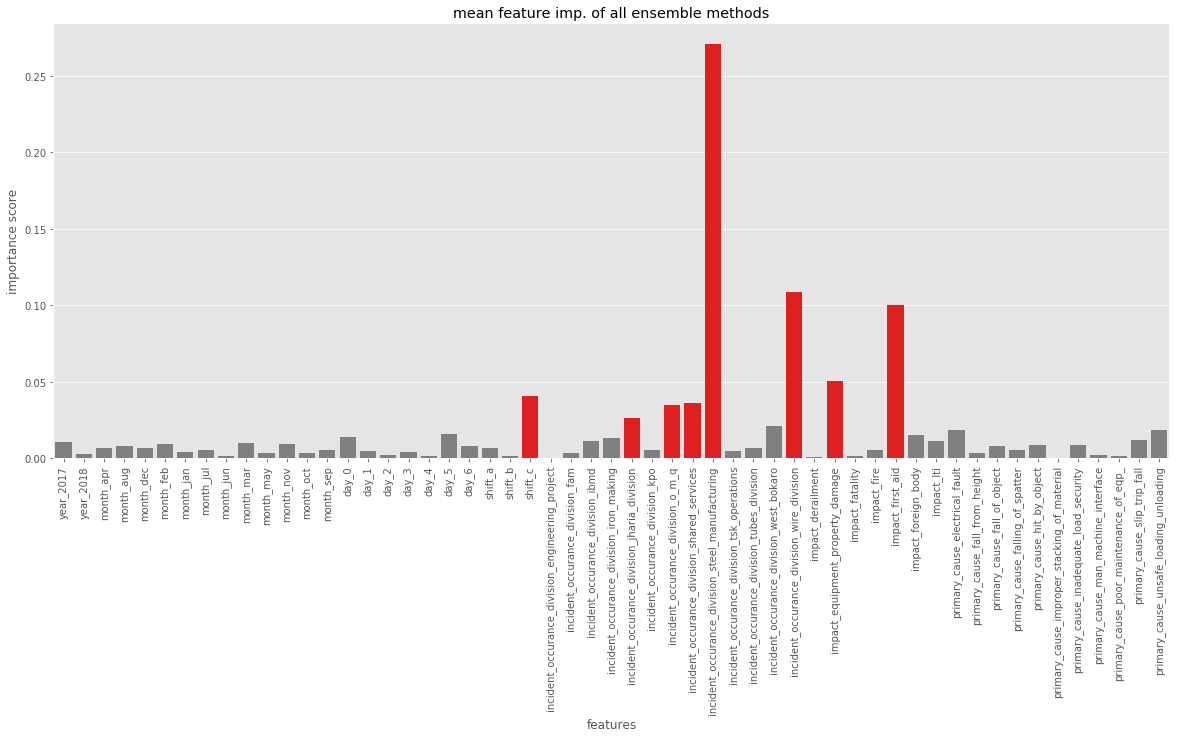

In [0]:
rfc_is = rfc.feature_importances_
abc_is = abc.feature_importances_
gbc_is = gbc.feature_importances_

def fxy(x, y, z):
    return (0.762 * x + 0.743 * y + 0.856 * z) / (0.762 + 0.743 + 0.856)

mean_fi = fxy(rfc_is, abc_is, gbc_is)

mean_fi_sort = np.sort(mean_fi,)[::-1]
plt.figure(figsize=(20, 8))
sns.barplot(y=mean_fi, x=data.columns, palette=['red' if x in mean_fi_sort[:8] else 'grey' for x in mean_fi])
plt.title('mean feature imp. of all ensemble methods')
plt.ylabel('importance score')
plt.xlabel('features')
plt.xticks(rotation=90)
plt.show()

In [0]:
# support vector classifier
svc = SVC(kernel='linear')
svc.fit(data, label)
svc.score(data, label)

0.7668161434977578

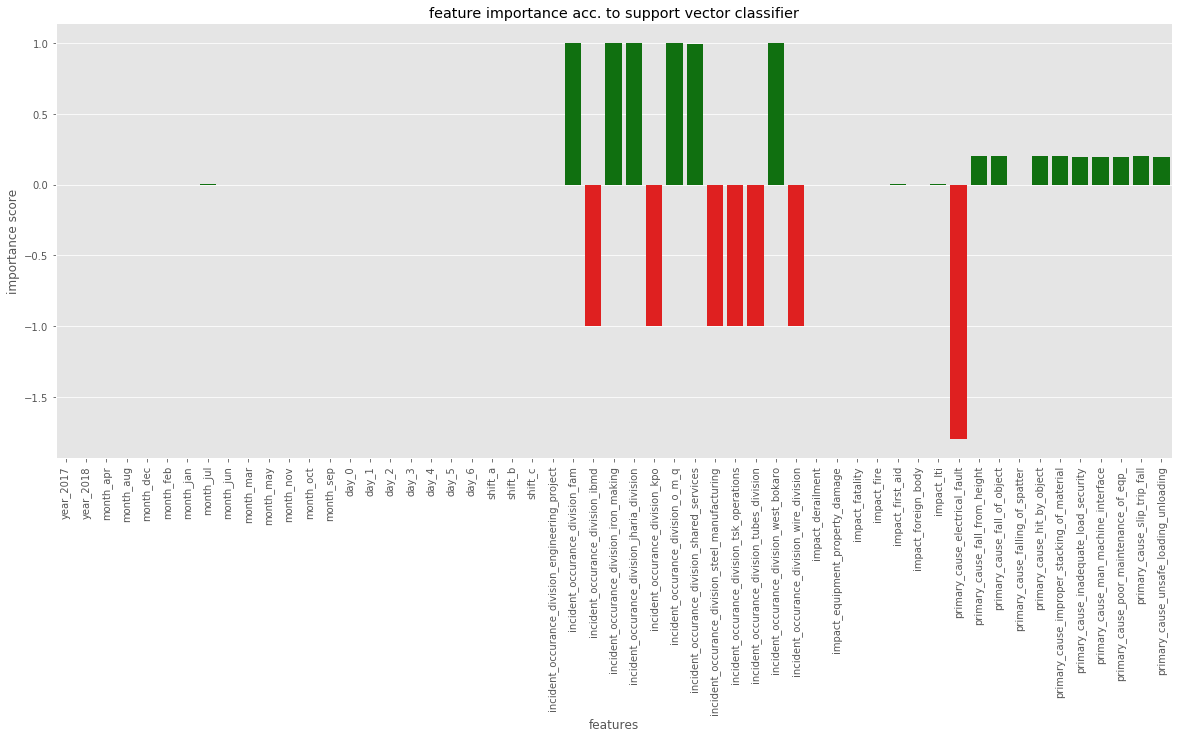

In [0]:
# importance of each feature in decision making according to support vector classifier
plt.figure(figsize=(20, 8))
sns.barplot(y=svc.coef_.ravel(), x=data.columns, palette=['green' if x > 0 else 'red' for x in svc.coef_.ravel()],)
plt.title('feature importance acc. to support vector classifier')
plt.ylabel('importance score')
plt.xlabel('features')
plt.xticks(rotation=90)
plt.show()

# checking activity type against different features

In [0]:
df.loc[df['impact'] == 'foreign_body', 'activity_type'].value_counts()

operations    11
Name: activity_type, dtype: int64

In [0]:
df.loc[df['incident_occurance_division'] == 'wire_division', 'activity_type'].value_counts()

operations     127
maintenance     48
Name: activity_type, dtype: int64

In [0]:
df.loc[df['primary_cause'] == 'electrical_fault', 'activity_type'].value_counts()

operations     58
maintenance    21
Name: activity_type, dtype: int64

In [0]:
df.loc[df['shift'] == 'c', 'activity_type'].value_counts()

operations     82
maintenance    17
Name: activity_type, dtype: int64

In [0]:
df.loc[df['day'] == '0', 'activity_type'].value_counts()

operations     68
maintenance    42
Name: activity_type, dtype: int64

In [0]:
df.loc[df['month'] == 'dec', 'activity_type'].value_counts()

operations     32
maintenance    19
Name: activity_type, dtype: int64

In [0]:
df.loc[df['year'] == '2018', 'activity_type'].value_counts()

operations     118
maintenance     46
Name: activity_type, dtype: int64

# plotting activity type against various features

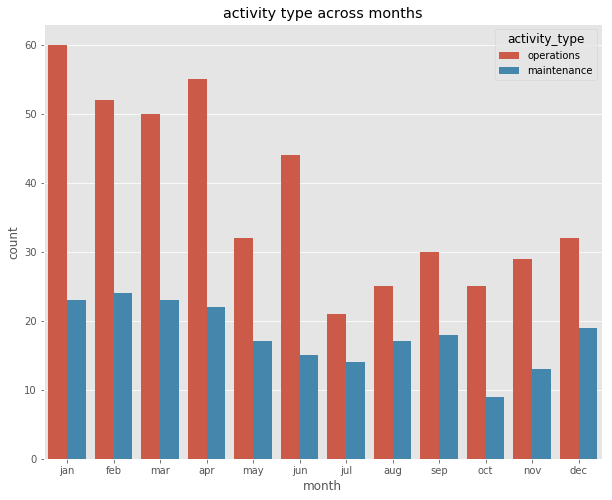

In [0]:
# plotting activity types across months
plt.figure(figsize=(10, 8))
sns.countplot(x='month', data=df, hue='activity_type', dodge=True, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 
                                                                          'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('activity type across months')
plt.show()

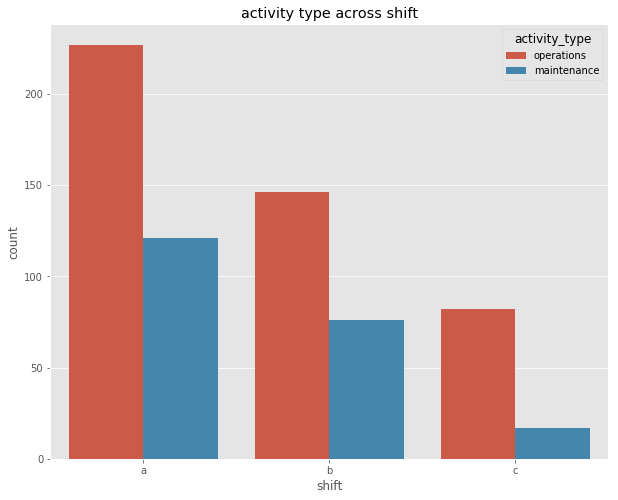

In [0]:
# plotting activity types across shift
plt.figure(figsize=(10, 8))
sns.countplot(x='shift', data=df, hue='activity_type', dodge=True, order=['a', 'b', 'c'])
plt.title('activity type across shift')
plt.show()

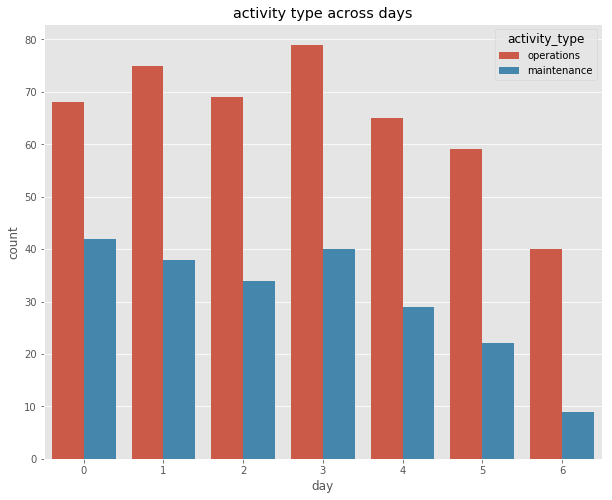

In [0]:
# plotting activity types across day
plt.figure(figsize=(10, 8))
sns.countplot(x='day', data=df, hue='activity_type', dodge=True)
plt.title('activity type across days')
plt.show()

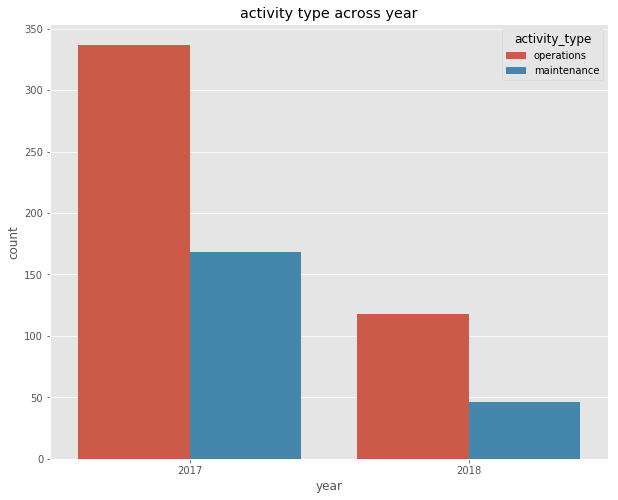

In [0]:
# plotting activity types across year
plt.figure(figsize=(10, 8))
sns.countplot(x='year', data=df, hue='activity_type', dodge=True, order=['2017', '2018'])
plt.title('activity type across year')
plt.show()

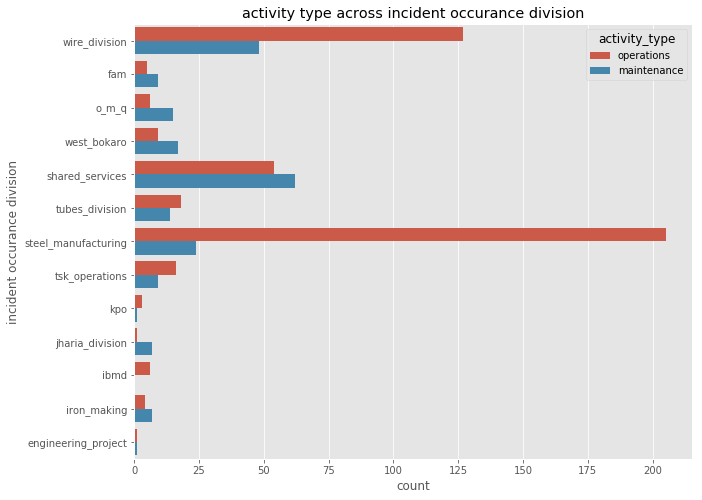

In [0]:
# plotting activity types across shift
plt.figure(figsize=(10,8))
sns.countplot(y='incident_occurance_division', data=df, hue='activity_type', dodge=True,)
plt.title('activity type across incident occurance division')
plt.ylabel('incident occurance division')
plt.show()

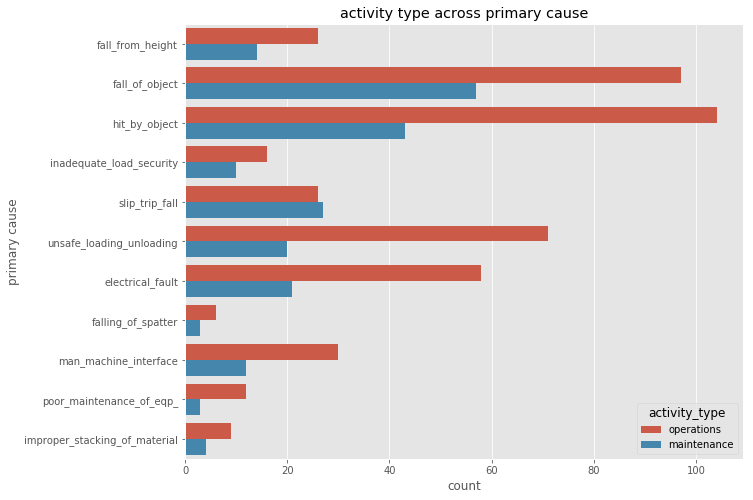

In [0]:
plt.figure(figsize=(10,8))
sns.countplot(y='primary_cause', data=df, hue='activity_type', dodge=True,)
plt.title('activity type across primary cause')
plt.ylabel('primary cause')
plt.show()

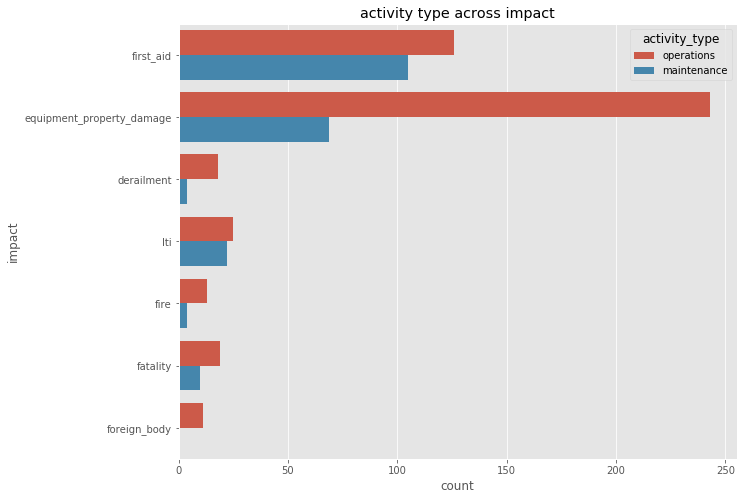

In [0]:
# 
plt.figure(figsize=(10,8))
sns.countplot(y='impact', data=df, hue='activity_type', dodge=True,)
plt.title('activity type across impact')
plt.ylabel('impact')
plt.show()

# try

In [0]:
# take subsample of operation activity type
# remove the incident division category column
# samples with operations activity type in steel manufacturing can be removed to remove imbalance

# taking subsample of operations activity type

In [0]:
df.loc[df['activity_type']=='maintenance'].shape

(214, 8)

In [0]:
small_data1 = df.loc[df['activity_type']=='operations'].sample(214, random_state=24)
small_data2 = df.loc[df['activity_type']=='maintenance']

In [0]:
small_data2.head()

,year,month,day,shift,incident_occurance_division,impact,activity_type,primary_cause
6,2018,jan,0,a,fam,first_aid,maintenance,slip_trip_fall
7,2017,dec,4,b,o_m_q,first_aid,maintenance,fall_of_object
9,2017,nov,0,b,shared_services,lti,maintenance,electrical_fault
10,2017,apr,2,a,shared_services,equipment_property_damage,maintenance,electrical_fault
24,2017,apr,2,a,shared_services,lti,maintenance,fall_of_object


In [0]:
small_df = pd.concat([small_data1, small_data2], ignore_index=True)

In [0]:
small_df.shape

(428, 8)

In [0]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 8 columns):
year                           428 non-null object
month                          428 non-null object
day                            428 non-null object
shift                          428 non-null object
incident_occurance_division    428 non-null object
impact                         428 non-null object
activity_type                  428 non-null object
primary_cause                  428 non-null object
dtypes: object(8)
memory usage: 26.8+ KB


In [0]:
# getting the label and encoding it
label = small_df['activity_type']
label = label.map({'operations':0, 'maintenance':1})

In [0]:
# columns of data
cols = ['year', 'month', 'day', 'shift', 'incident_occurance_division', 'impact', 'primary_cause']

# one hot encoding the data
small_data = pd.get_dummies(small_df[cols])

In [0]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(small_data, label)
tree.score(small_data, label)

0.7570093457943925

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


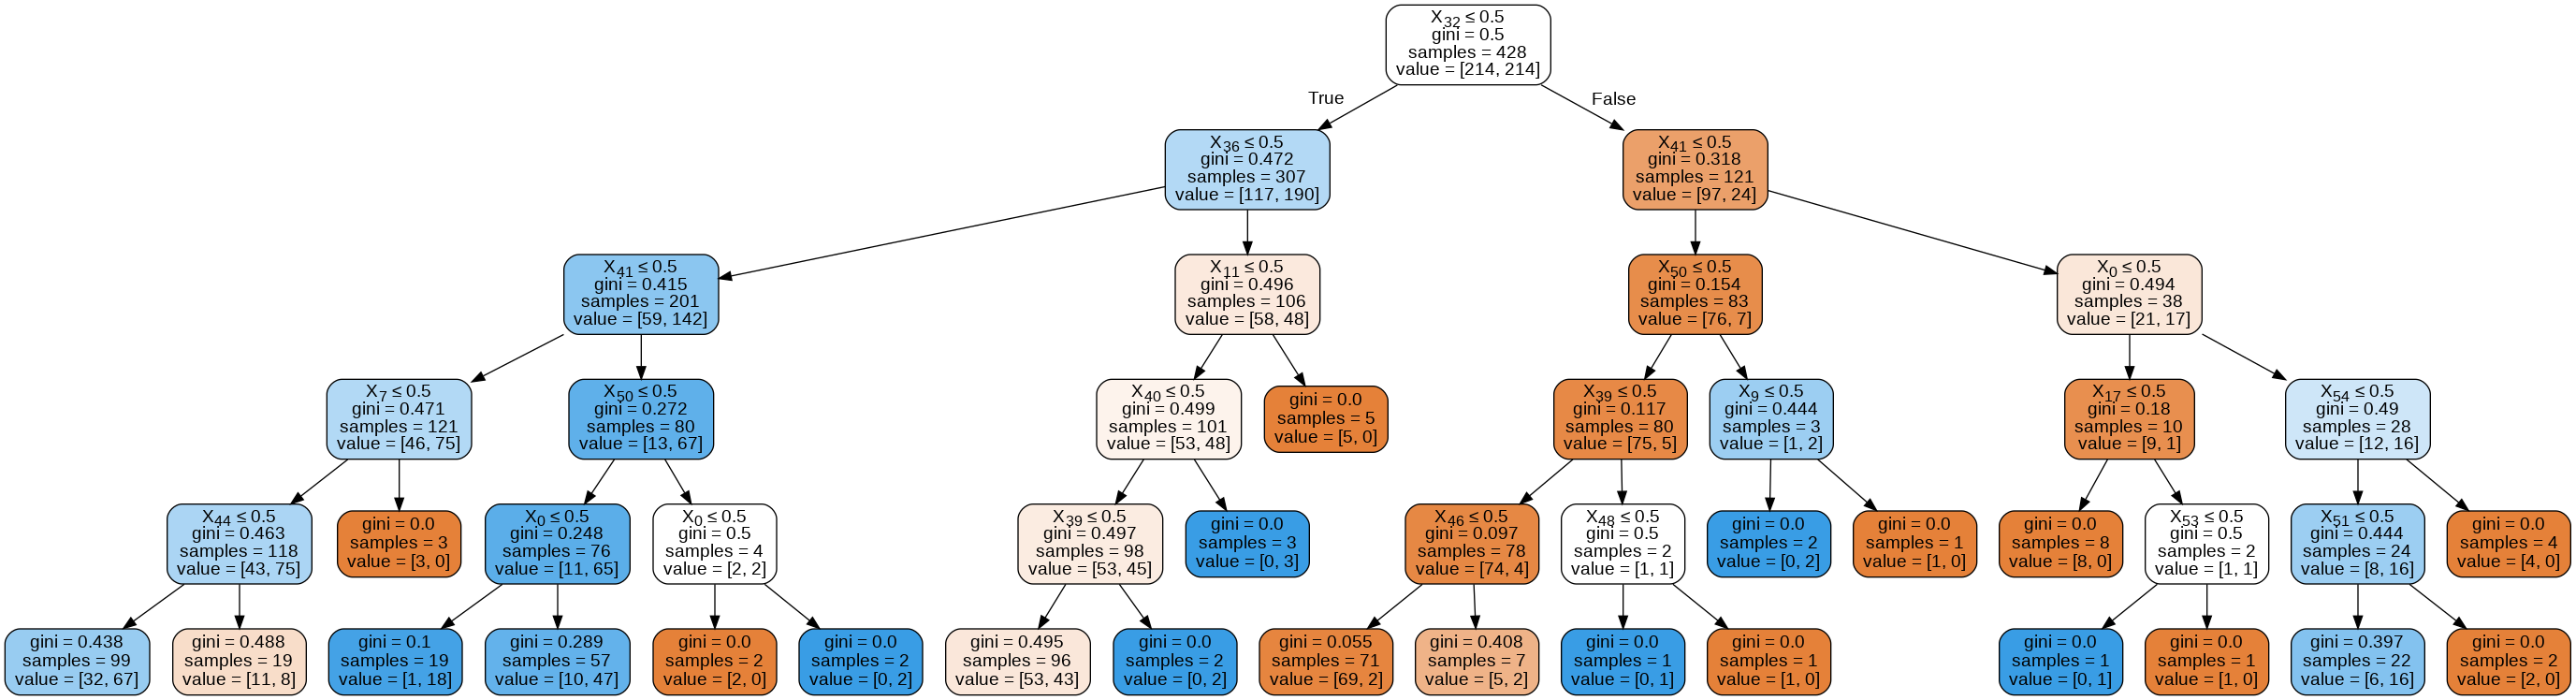

In [0]:
# Visualizing the tree                 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
# graph.write_pdf('tree.pdf')
Image(graph.create_png())

In [0]:
# code to get rules from the tree

from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [0]:
tree_to_code(tree, small_data.columns)

def tree(year_2017, year_2018, month_apr, month_aug, month_dec, month_feb, month_jan, month_jul, month_jun, month_mar, month_may, month_nov, month_oct, month_sep, day_0, day_1, day_2, day_3, day_4, day_5, day_6, shift_a, shift_b, shift_c, incident_occurance_division_engineering_project, incident_occurance_division_fam, incident_occurance_division_ibmd, incident_occurance_division_iron_making, incident_occurance_division_jharia_division, incident_occurance_division_kpo, incident_occurance_division_o_m_q, incident_occurance_division_shared_services, incident_occurance_division_steel_manufacturing, incident_occurance_division_tsk_operations, incident_occurance_division_tubes_division, incident_occurance_division_west_bokaro, incident_occurance_division_wire_division, impact_derailment, impact_equipment_property_damage, impact_fatality, impact_fire, impact_first_aid, impact_foreign_body, impact_lti, primary_cause_electrical_fault, primary_cause_fall_from_height, primary_cause_fall_of_objec

In [0]:
pip install skope-rules

     |████████████████████████████████| 2.0MB 7.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/3e/8d/56/464f328ff3200c785626967ee39a6b2efc455469dab615f03e
Successfully built skope-rules


In [0]:
# !pip install skope-rules
from skrules import SkopeRules


feature_names = small_data.columns
clf = SkopeRules(max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names=feature_names)

for idx, species in enumerate(label.unique()):
    X, y = small_data, label
    clf.fit(X, y == idx)
    rules = clf.rules_[:5]
    print("Activity type: ", species)
    for rule in rules:
        print(rule)
    print()
    print(20*'=')
    print()

Activity type:  0
('incident_occurance_division_steel_manufacturing > 0.5 and primary_cause_fall_of_object <= 0.5 and primary_cause_inadequate_load_security <= 0.5', (0.8756944444444444, 0.4086554621848739, 2))
('impact_fatality <= 0.5 and impact_first_aid <= 0.5 and incident_occurance_division_steel_manufacturing > 0.5', (0.925175846400634, 0.36576061838877116, 9))
('impact_fire <= 0.5 and incident_occurance_division_steel_manufacturing <= 0.5 and incident_occurance_division_wire_division > 0.5', (0.5623187450762573, 0.2703134117074264, 7))
('incident_occurance_division_steel_manufacturing <= 0.5 and incident_occurance_division_wire_division <= 0.5 and primary_cause_slip_trip_fall <= 0.5', (0.32566172998395804, 0.26776512375188455, 8))


Activity type:  1
('incident_occurance_division_ibmd <= 0.5 and incident_occurance_division_steel_manufacturing <= 0.5 and incident_occurance_division_wire_division <= 0.5', (0.7145186944316175, 0.6779298812081105, 3))
('incident_occurance_division_st

# removing the incident occurance division column

In [0]:
df = pd.read_csv('/content/drive/My Drive/cleaned_data3.csv')

df['day'] = df.day.astype(str)
df['year'] = df.year.astype(str)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 8 columns):
year                           669 non-null object
month                          669 non-null object
day                            669 non-null object
shift                          669 non-null object
incident_occurance_division    669 non-null object
impact                         669 non-null object
activity_type                  669 non-null object
primary_cause                  669 non-null object
dtypes: object(8)
memory usage: 41.9+ KB


In [0]:
# getting data
cols = ['year', 'month', 'day', 'shift', 'impact', 'primary_cause']
data = pd.get_dummies(df[cols])

# getting the label and encoding it
label = df['activity_type']
label = label.map({'operations':0, 'maintenance':1})

0.7399103139013453


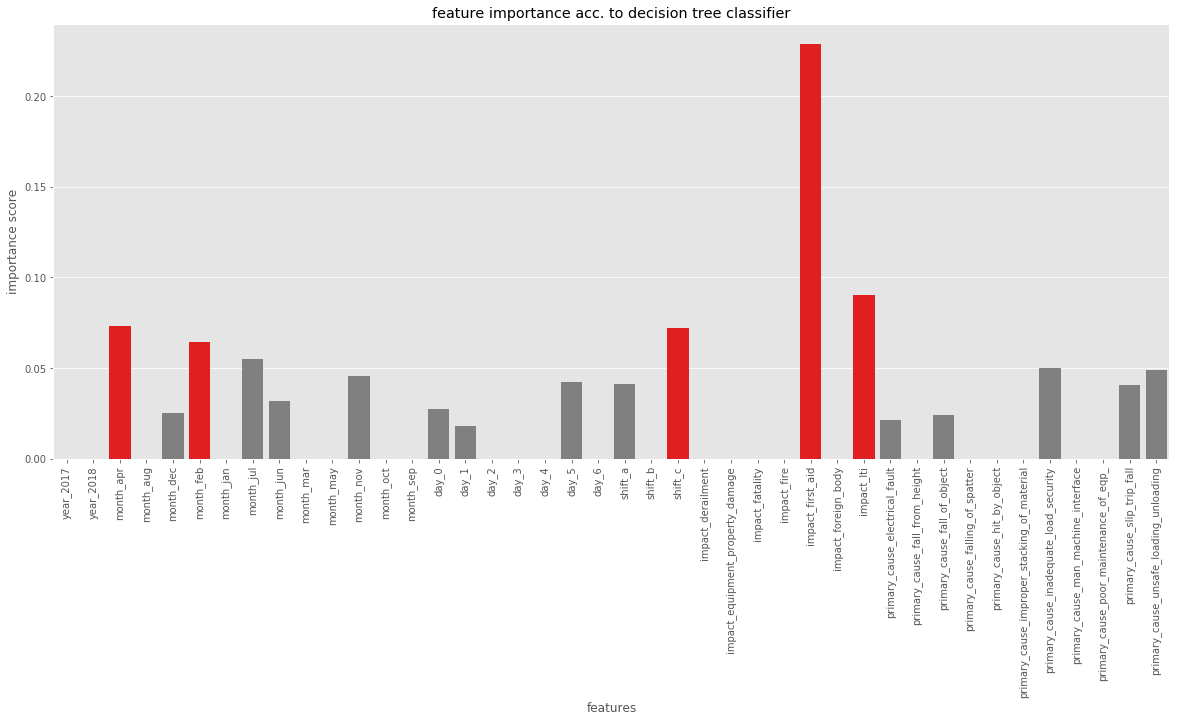

In [0]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(data, label)
print(tree.score(data, label))

# importance of each feature in decision making according to decision tree classifier
tree_fi = np.sort(tree.feature_importances_,)[::-1]
plt.figure(figsize=(20, 8))
sns.barplot(y=tree.feature_importances_, x=data.columns, palette=['red' if x in tree_fi[:5] else 'grey' for x in tree.feature_importances_])
plt.title('feature importance acc. to decision tree classifier')
plt.ylabel('importance score')
plt.xlabel('features')
plt.xticks(rotation=90)
plt.show()

In [0]:
# !pip install skope-rules
from skrules import SkopeRules


feature_names = data.columns
clf = SkopeRules(max_depth_duplication=2,
                 n_estimators=30,
                 precision_min=0.3,
                 recall_min=0.1,
                 feature_names=feature_names)

for idx, species in enumerate(['operations', 'maintenance']):
    X, y = data, label
    clf.fit(X, y == idx)
    rules = clf.rules_[:5]
    print("Activity type: ", species)
    for rule in rules:
        print(rule)
    print()
    print(20*'=')
    print()

Activity type:  operations
('impact_first_aid <= 0.5 and impact_lti <= 0.5 and primary_cause_slip_trip_fall <= 0.5', (0.7924790461574122, 0.6454420552793606, 18))
('impact_equipment_property_damage > 0.5 and primary_cause_inadequate_load_security <= 0.5 and primary_cause_slip_trip_fall <= 0.5', (0.8199626040893395, 0.5045787545787546, 3))
('day_0 <= 0.5 and impact_equipment_property_damage <= 0.5 and impact_foreign_body <= 0.5', (0.6272944693572495, 0.38491563081727015, 2))
('impact_first_aid > 0.5 and month_jul <= 0.5 and primary_cause_unsafe_loading_unloading <= 0.5', (0.5822916666666667, 0.25069048467569494, 2))
('impact_first_aid > 0.5 and month_aug <= 0.5 and shift_c <= 0.5', (0.5337837837837838, 0.21525885558583105, 1))


Activity type:  maintenance
('impact_derailment <= 0.5 and impact_equipment_property_damage <= 0.5 and impact_foreign_body <= 0.5', (0.4312977099236641, 0.6726190476190477, 1))
('impact_first_aid > 0.5 and month_apr <= 0.5 and shift_c <= 0.5', (0.532568664060224

# ensemble

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, label, random_state=24)

In [0]:
lr = LogisticRegression(random_state=24)
lr.fit(X_train, y_train)
lr_prob = lr.predict_proba(X_train)
lr.score(X_test, y_test)


0.6607142857142857

In [0]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)
dt_prob = dt.predict_proba(X_train)
print(dt.score(X_test, y_test))

0.6488095238095238


In [0]:
rf = RandomForestClassifier(n_estimators=50, max_depth=4)
rf.fit(X_train, y_train)
rf_prob = rf.predict_proba(X_train)
rf.score(X_test, y_test)

0.6785714285714286

In [0]:
gbc = GradientBoostingClassifier(random_state=24)
gbc.fit(X_train, y_train)
gbc_prob = gbc.predict_proba(X_train)
gbc.score(X_test, y_test)

0.6369047619047619


In [0]:
abc = AdaBoostClassifier(random_state=24)
abc.fit(X_train, y_train)
abc_prob = abc.predict_proba(X_train)
abc.score(X_test, y_test)

0.6607142857142857

In [0]:
# probs_one = np.vstack((lr_prob, dt_prob, gbc_prob)).T
# ones = np.ones_like(probs_one)
# probs_zero = ones - probs_one

train_probs, test_probs = get_proba([])

In [0]:
train_probs.shape

(501, 4)

In [0]:
def is_pareto_front(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    
    # assume that every solution in the cost in non-dominated solution
    is_front = np.ones(costs.shape[0], dtype = bool)
    # loop through the cost and compare if in a particular cost....both the elements are 
    # less than another cost...if so assign False to it.
    for i, c in enumerate(costs):
        is_front[i] = np.all(np.any(costs[:i]<c, axis=1)) and np.all(np.any(costs[i+1:]<c, axis=1))
        
    # get the index of pareto-optimal solutions    
    pf_idx = np.where(is_front==True)
    # get the indices of those which are not pareto-optimal
    npf_idx = np.where(is_front==False)
    
    return pf_idx, npf_idx


# multiobjective differential evolution algorithm
def mode(fobj, bounds, mut=0.8, crossp=0.7, popsize=30, iters=200):
    '''
    input: the objective function and the bounds of the variables
    output: final population
            final fitness
            index of pareto-optimal solutions
            index of non pareto-optimal solutions
    '''
    # get to know the number of variables....dimensions = no_of_models*2
    dimensions = len(bounds)
    # generate a random initial population
    pop = np.random.rand(popsize, dimensions)
    
    # normalize the population within the given bounds
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    
    # calculate fitness of each individual 
    fitness = np.asarray([fobj(wt, train_probs) for wt in pop_denorm])
    
    # find the pareto-optimal solutions
    pf_idx, npf_idx = is_pareto_front(fitness)
     
    # loop through the number of iterations    
    for i in range(iters):
        # for every individual in the population
        for j in range(popsize):
            # choose one individual randomly from the pareto-optimal solutions
            # and two individuals randomly without replacement from non-optimal solutions
            idxs = [idx for idx in range(popsize) if idx != j]
            a = pop[np.random.choice(pf_idx[0])]
            b, c = pop[np.random.choice(npf_idx[0], 2, replace=False)]
            
            # create a mutant
            mutant = np.clip(a + mut * (b - c), 0, 1)
            
            # randomly select the crossover points across the individual weights
            # and apply the crossover operation between the mutant and the original
            # and get the trial vector
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
                
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            
            # calculate the fitness of the trial vector
            f = fobj(trial_denorm, train_probs)
            
            # if this is better than the fitness of the original individual
            # replace the original with the trial vector in the population
            if f[0] >= fitness[j][0] and f[1] >= fitness[j][1]:          
                fitness[j] = f
                pop_denorm[j] = trial_denorm
        
        # now calculate the pareto-optimal solutions again
        pf_idx, npf_idx = is_pareto_front(fitness)
       
    print('Done')
    return pop_denorm, fitness, pf_idx[0], npf_idx[0]

# this is the multiobjective function
def fun(x, train_probs):
    '''
    this function returns two values...one is precision...and the other is recall..
    the objective is to maximise both precision and recall.
    
    input: list of weights that has the shape (number_of_models*2, )
    output: returns a list with two elements, precision and recall.
    '''
    preds = [1 if x>0 else 0 for x in np.dot(train_probs, x)]
    pre = precision_score(y_train, preds)
    rec = recall_score(y_train, preds)
    return [pre, rec]

# function to get horizontal stack of probabilities of multiple models
def get_proba(model_list, ones=False):    
    test_proba = np.zeros((X_test.shape[0], 2*len(model_list)))
    train_proba = np.zeros((X_train.shape[0], 2*len(model_list)))
    for i, model in enumerate(model_list):
        ins = clone(model)
        ins.fit(X_train, y_train)
        y_pred_train = ins.predict_proba(X_train)
        y_pred_test = ins.predict_proba(X_test)
        train_proba[:, [2*i, 2*i+1]] = y_pred_train
        test_proba[:, [2*i, 2*i+1]] = y_pred_test  
    if ones:
        return train_proba[:, [i for i in range(1, 2*len(model_list), 2)]], test_proba[:,[i for i in range(1, 2*len(model_list)+1, 2)]]
    return train_proba, test_proba

In [0]:
# code for single objective differential evolution
def func(x):
    preds = [1 if y > 0 else 0 for y in np.dot(train_probs, x)]
    acc = accuracy_score(y_train, preds)
    return 1 - acc

bounds = [(-1, 0), (0, 1), (-1, 0), (0, 1)]
result = differential_evolution(func, bounds)

In [0]:
bounds = [(-1, 0), (0, 1), (-1, 0), (0, 1)]
pop, fitness, pf_idx, npf_idx = mode(fun, bounds,)

Done


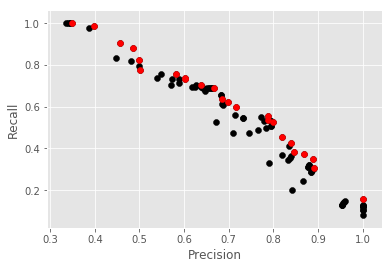

In [0]:
X = [i[0] for i in fitness]
y = [i[1] for i in fitness]

pf_X = [i[0] for i in fitness[pf_idx]]
pf_y = [i[1] for i in fitness[pf_idx]]

plt.scatter(X, y, c='k')
plt.scatter(pf_X, pf_y, c='r')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

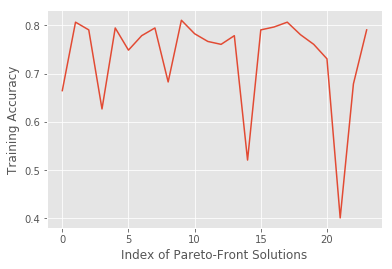

Best Training Weights: [-0.24074317  0.93618049 -0.05542696  1.        ]
Best Training Accuracy: 0.810379241516966


In [0]:
acc_scores = []
for i in range(len(pf_idx)):
    weights = pop[pf_idx[i]]
    y_pred = [1 if x>0 else 0 for x in np.dot(train_probs, weights)]
    acc = accuracy_score(y_train, y_pred)
    acc_scores.append(acc)

best_idx = np.argmax(acc_scores)

plt.plot(acc_scores)
plt.ylabel('Training Accuracy')
plt.xlabel('Index of Pareto-Front Solutions')
plt.show()

print(f'Best Training Weights: {pop[best_idx]}')
print(f'Best Training Accuracy: {acc_scores[best_idx]}')

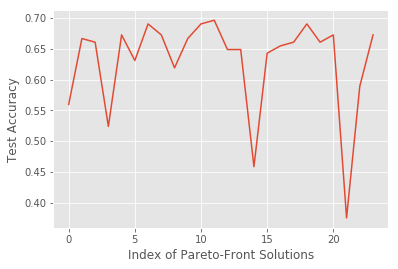

Best Test Weights: [ 0.          0.19144931 -0.20927269  0.42744595]
Best Test Accuracy: 0.6964285714285714


In [0]:
lr_prob = lr.predict_proba(X_test)
# dt_prob = dt.predict_proba(X_test)
# rf_prob = rf.predict_proba(X_test)
# abc_prob = abc.predict_proba(X_test)
gbc_prob = gbc.predict_proba(X_test)
# xgb_prob = xgb.predict_proba(X_test)

probs = np.hstack((lr_prob, gbc_prob))

acc_scores = []
for i in range(len(pf_idx)):
    weights = pop[pf_idx[i]]
    y_pred = [1 if x>0 else 0 for x in np.dot(probs, weights)]
    acc = accuracy_score(y_test, y_pred)
    acc_scores.append(acc)
    
best_idx = np.argmax(acc_scores)

plt.plot(acc_scores)
plt.ylabel('Test Accuracy')
plt.xlabel('Index of Pareto-Front Solutions')
plt.show()

print(f'Best Test Weights: {pop[best_idx]}')
print(f'Best Test Accuracy: {acc_scores[best_idx]}')

# catboost and xgboost


In [0]:
cat = CatBoostClassifier(loss_function='Logloss', learning_rate=0.01, depth=4)
cat.fit(X_train, y_train)

NameError: ignored

In [0]:
cat.score(X_test, y_test)

NameError: ignored

In [0]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_prob = xgb.predict_proba(X_train)

In [0]:
xgb.score(X_test, y_test)

0.7738095238095238

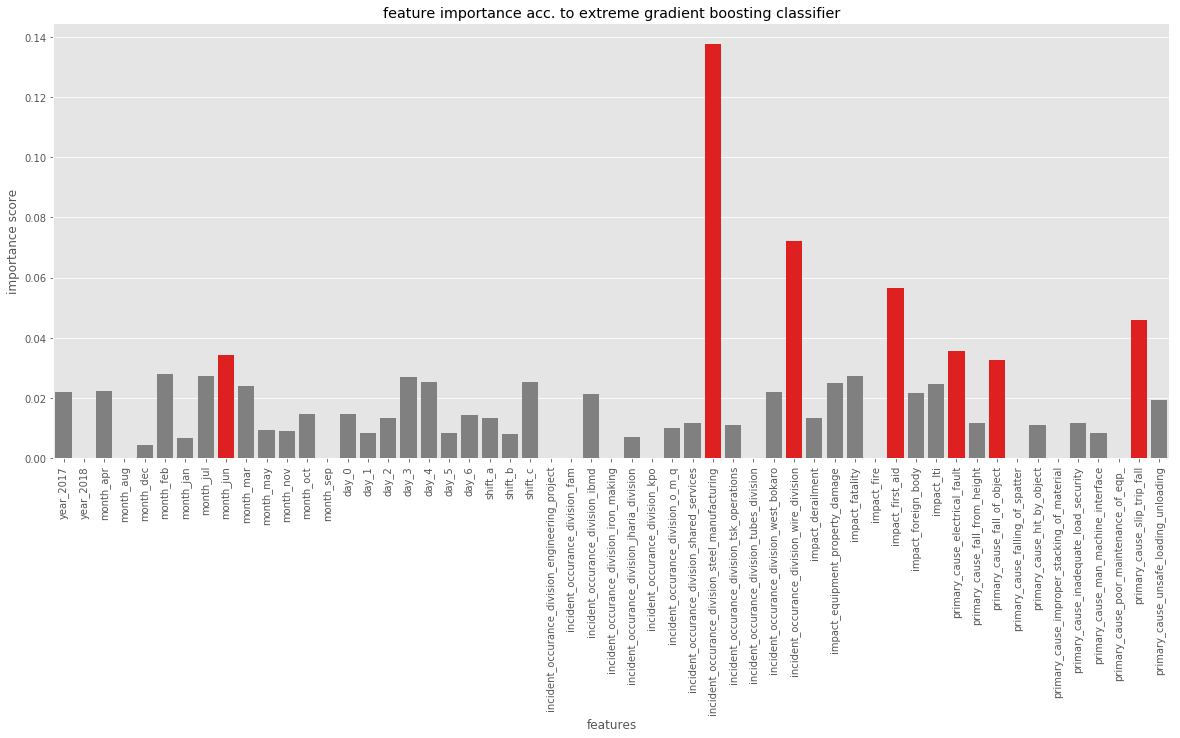

In [0]:
# importance of each feature in decision making according to extreme gradient boosting classifier
xgb_fi = np.sort(xgb.feature_importances_,)[::-1]
plt.figure(figsize=(20, 8))
sns.barplot(y=xgb.feature_importances_, x=data.columns, palette=['red' if x in xgb_fi[:7] else 'grey' for x in xgb.feature_importances_])
plt.title('feature importance acc. to extreme gradient boosting classifier')
plt.ylabel('importance score')
plt.xlabel('features')
plt.xticks(rotation=90)
plt.show()

# VotingClassifier

In [0]:
vcf = VotingClassifier(estimators=[('lr', lr), ('gbc', gbc)], voting='soft', weights=[0.15,0.95])
vcf.fit(X_train, y_train)
vcf.score(X_test, y_test)

0.7976190476190477

# all models

In [0]:
model_acc = OrderedDict()

lr = LogisticRegression(random_state=24)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=24)
gbc = GradientBoostingClassifier(random_state=24)
svc = SVC(random_state=24)
dt = DecisionTreeClassifier(max_depth=4, random_state=24)


def foo(type, model):
    '''
    input: takes the machine learning model
    output: return the test accuracy
    '''
    # single classifier
    # requires a single classifier model
    if type == 0:
        model.fit(X_train, y_train)
        return model.score(X_test,y_test)
    # bagging classifier
    # just requires a single base model
    elif type == 1:
        model = BaggingClassifier(base_estimator=model, n_estimators=20, max_samples=0.5, random_state=24)
        model.fit(X_train, y_train)
        return model.score(X_test,y_test)
    # boosting classifier
    # just requires a single base model
    elif type == 2:
        model = AdaBoostClassifier(base_estimator=model, n_estimators=20, learning_rate=0.01, 
                                   algorithm='SAMME', random_state=24,)
        model.fit(X_train, y_train)
        return model.score(X_test,y_test)
    # ensemble classifier
    # required argument as specified format
    # [('lr', lr), ('rf', rfc)] etc, etc
    elif type == 3:
        vcf = VotingClassifier(estimators=model,)
        vcf.fit(X_train, y_train)
        return vcf.score(X_test, y_test)
    # multi-objective differential evolution optimization
    # requires the model argument as a list
    elif type == 4:
        train_probs, test_probs = get_proba(model)
        bounds = [(0,1) if i%2 else (-1, 0) for i in range(train_probs.shape[1])]
        pop, fitness, pf_idx, npf_idx = mode(fun, bounds, train_probs)
        acc_scores = []
        for i in range(len(pf_idx)):
            weights = pop[pf_idx[i]]
            y_pred = [1 if x>0 else 0 for x in np.dot(test_probs, weights)]
            acc = accuracy_score(y_test, y_pred)
            acc_scores.append(acc)

        best_idx = np.argmax(acc_scores)
        return acc_scores[best_idx]
    # single objective differential equation
    elif type == 5:
        train_probs, test_probs = get_proba(model, ones=True)

        bounds = [(0,1)] * train_probs.shape[1]
        def func(x):
            preds = [1 if x > 0.4 else 0 for x in np.dot(train_probs, x)]
            acc = accuracy_score(y_train, preds)
            return 1 - acc
        result = differential_evolution(func, bounds,)
        weights = result.x
        y_pred = [1 if x > 0.5 else 0 for x in np.dot(test_probs, weights)]
        return accuracy_score(y_test, y_pred)
        
    

model_dict = {'LR': [0, lr], 'DT': [0, dt], 'KNN': [0, knn], 'SVC': [0, svc], 'RF': [0, rfc], 'GBC': [0, gbc],    
              'Bagging + LR': [1, lr], 'Bagging + DT': [1, dt], 'Bagging + SVC': [1, svc], 
              'Bagging + KNN': [1, knn], 'AdaBoost + LR': [2, lr], 
              'AdaBoost + DT': [2, DecisionTreeClassifier(max_depth=2, random_state=24)],
              'AdaBoost + SVC': [2, svc], 'LR + DT': [3, [('lr', lr), ('dt', dt)]], 
              'LR + KNN': [3, [('lr', lr), ('knn', knn)]], 'LR + SVC': [3, [('lr', lr), ('svc', svc)]],
              'LR + RF': [3, [('lr', lr), ('rfc', rfc)]], 'LR + GBC': [3, [('lr', lr), ('gbc', gbc)]],
              'KNN + SVC': [3, [('knn', knn), ('svc', svc)]], 'KNN + RF': [3, [('knn', knn), ('rfc', rfc)]],
              'KNN + GBC': [3, [('knn', knn), ('gbc', gbc)]], 'LR + KNN + RF': [3, [('lr', lr), ('knn', knn), ('rfc', rfc)]],
              'MODE + LR + KNN': [4, [lr, knn]], 'MODE + LR + GBC': [4, [lr, gbc]], 'MODE + DT + KNN': [4, [lr, knn]],
              'MODE + LR + KNN + RF': [4, [lr, knn, rfc]], 'DE + LR + KNN + RF': [5, [lr, knn, rfc]],
              'DE + LR + KNN + GBC': [5, [lr, knn, gbc]]}

for key, value in model_dict.items():
    if value[0] == 0:
        model_acc[key] = foo(0, value[1])
    elif value[0] == 1:
        model_acc[key] = foo(1, value[1])
    elif value[0] == 2:
        model_acc[key] = foo(2, value[1])
    elif value[0] == 3:
        model_acc[key] = foo(3, value[1])
    elif value[0] == 4:
        model_acc[key] = foo(4, value[1])
    elif value[0] == 5:
        model_acc[key] = foo(5, value[1])


    
model_df = pd.DataFrame(model_acc.values(), index=model_acc.keys(), columns=['Accuracy'])
model_df

Done
Done
Done
Done


,Accuracy
LR,0.750000
DT,0.755952
KNN,0.714286
SVC,0.678571
RF,0.744048
GBC,0.761905
Bagging + LR,0.755952
Bagging + DT,0.738095
Bagging + SVC,0.678571
Bagging + KNN,0.744048


In [0]:
model_df.sort_values(by='Accuracy', ascending=False).head(10)

,Accuracy
MODE + LR + GBC,0.779762
DE + LR + KNN + GBC,0.773810
GBC,0.761905
LR + KNN + RF,0.761905
DT,0.755952
MODE + LR + KNN + RF,0.755952
MODE + DT + KNN,0.755952
Bagging + LR,0.755952
MODE + LR + KNN,0.755952
LR,0.750000


In [0]:
foo(5, [lr, dt, rfc])

1
3
5
7
9


In [0]:
l = [(0, 1)] * 3

In [0]:
l

[(0, 1), (0, 1), (0, 1)]